In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Arrange Dataset

In [2]:
df = pd.read_csv('dataset.csv')
df.drop('sID', axis=1, inplace=True)
df

,Datetime,Count
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2
...,...,...
11851,31-12-2013 19:00,286
11852,31-12-2013 20:00,256
11853,31-12-2013 21:00,228
11854,31-12-2013 22:00,216


In [3]:
df.Datetime = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 
df.index = df.Datetime.values

In [4]:
df

,Datetime,Count
2012-08-25 00:00:00,2012-08-25 00:00:00,8
2012-08-25 01:00:00,2012-08-25 01:00:00,2
2012-08-25 02:00:00,2012-08-25 02:00:00,6
2012-08-25 03:00:00,2012-08-25 03:00:00,2
2012-08-25 04:00:00,2012-08-25 04:00:00,2
...,...,...
2013-12-31 19:00:00,2013-12-31 19:00:00,286
2013-12-31 20:00:00,2013-12-31 20:00:00,256
2013-12-31 21:00:00,2013-12-31 21:00:00,228
2013-12-31 22:00:00,2013-12-31 22:00:00,216


In [5]:
dates = pd.DataFrame()
dates['Day'] = df.Datetime.dt.day
dates['Month'] = df.Datetime.dt.month
dates['Year'] = df.Datetime.dt.year
dates['Hour'] = df.Datetime.dt.hour
dates

,Day,Month,Year,Hour
2012-08-25 00:00:00,25,8,2012,0
2012-08-25 01:00:00,25,8,2012,1
2012-08-25 02:00:00,25,8,2012,2
2012-08-25 03:00:00,25,8,2012,3
2012-08-25 04:00:00,25,8,2012,4
...,...,...,...,...
2013-12-31 19:00:00,31,12,2013,19
2013-12-31 20:00:00,31,12,2013,20
2013-12-31 21:00:00,31,12,2013,21
2013-12-31 22:00:00,31,12,2013,22


In [6]:
df = pd.concat([df, dates], axis=1)
df.drop('Datetime', axis=1, inplace=True)
df

,Count,Day,Month,Year,Hour
2012-08-25 00:00:00,8,25,8,2012,0
2012-08-25 01:00:00,2,25,8,2012,1
2012-08-25 02:00:00,6,25,8,2012,2
2012-08-25 03:00:00,2,25,8,2012,3
2012-08-25 04:00:00,2,25,8,2012,4
...,...,...,...,...,...
2013-12-31 19:00:00,286,31,12,2013,19
2013-12-31 20:00:00,256,31,12,2013,20
2013-12-31 21:00:00,228,31,12,2013,21
2013-12-31 22:00:00,216,31,12,2013,22


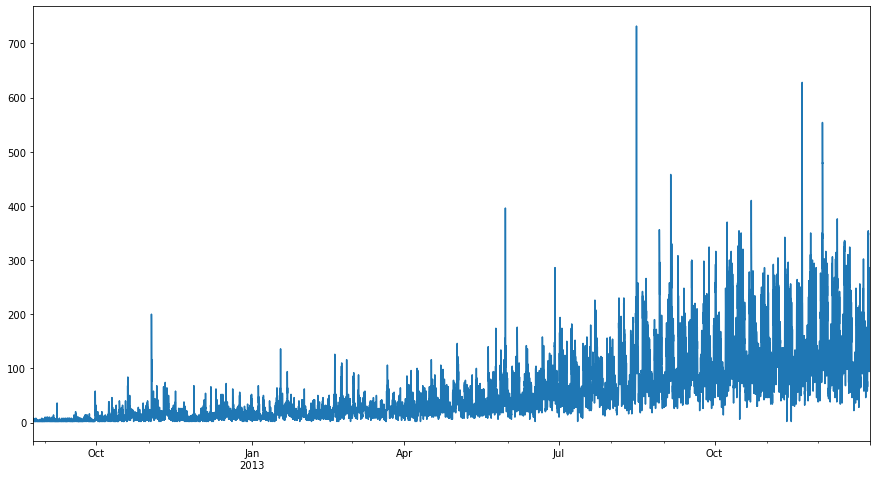

In [7]:
# df = df.diff().dropna()
plt.figure(figsize=(15,8))
df.Count.plot()
plt.show()

In [8]:
training_index = int(len(df.Count) * 0.9)
training=df[0:training_index] 
test=df[training_index:]

In [9]:
training

,Count,Day,Month,Year,Hour
2012-08-25 00:00:00,8,25,8,2012,0
2012-08-25 01:00:00,2,25,8,2012,1
2012-08-25 02:00:00,6,25,8,2012,2
2012-08-25 03:00:00,2,25,8,2012,3
2012-08-25 04:00:00,2,25,8,2012,4
...,...,...,...,...,...
2013-11-12 09:00:00,128,12,11,2013,9
2013-11-12 10:00:00,186,12,11,2013,10
2013-11-12 11:00:00,162,12,11,2013,11
2013-11-12 12:00:00,260,12,11,2013,12


In [10]:
test

,Count,Day,Month,Year,Hour
2013-11-12 14:00:00,200,12,11,2013,14
2013-11-12 15:00:00,6,12,11,2013,15
2013-11-12 16:00:00,2,12,11,2013,16
2013-11-12 17:00:00,4,12,11,2013,17
2013-11-12 18:00:00,4,12,11,2013,18
...,...,...,...,...,...
2013-12-31 19:00:00,286,31,12,2013,19
2013-12-31 20:00:00,256,31,12,2013,20
2013-12-31 21:00:00,228,31,12,2013,21
2013-12-31 22:00:00,216,31,12,2013,22


# Import metrics

In [11]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from math import sqrt

def calculate_metrics_and_print_results(test, prediction):
    mae = mean_absolute_error(test, prediction)
    print('Mean Absolute Error: %.3f' % mae)

    mape = mean_absolute_percentage_error(test, prediction)
    print('Mean Absolute Percentage Error %.3f' % mape)

    mse = mean_squared_error(test, prediction)
    print('Mean Squared Error %.3f' % mse)

    rmse = sqrt(mean_squared_error(test, prediction))
    print('Root Mean Squared Error:%.3f' % rmse)

# Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

# First Implementation

In [13]:
x_training = training.index.values.astype(float).reshape(-1, 1)
# x_training = training.Day.values.reshape(-1, 1)
y_training = training.Count

In [14]:
x_training = training.iloc[:, 1:]

In [15]:
model = LinearRegression().fit(x_training, y_training)

In [16]:
# y_test = test.index.values.astype(float).reshape(-1, 1)
x_test = test.iloc[:, 1:]
y_pred = model.predict(x_test)

In [17]:
df_lr_1 = pd.DataFrame({'Actual': test.Count.values, 'Predicted': y_pred})
df_lr_1

,Actual,Predicted
0,200,140.315173
1,6,142.004411
2,2,143.693649
3,4,145.382887
4,4,147.072125
...,...,...
1181,286,167.432780
1182,256,169.122018
1183,228,170.811256
1184,216,172.500494


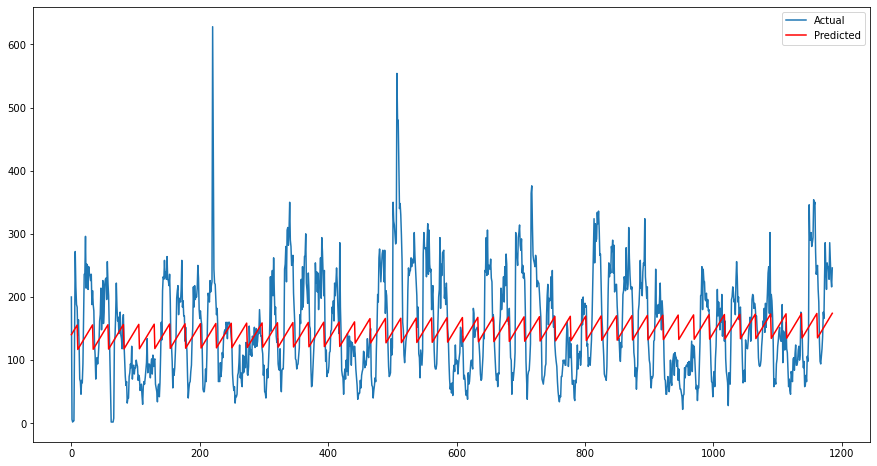

In [18]:
plt.figure(figsize=(15,8))
plt.plot(test.Count.values, label='Actual')
plt.plot(y_pred, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

In [19]:
calculate_metrics_and_print_results(test.Count.values, y_pred)

Mean Absolute Error: 59.884
Mean Absolute Percentage Error 0.871
Mean Squared Error 5443.626
Root Mean Squared Error:73.781


# Second Implementation

In [20]:
start = 0
middle = np.where(df.index == '2013-11-12 14:00:00')[0][0]
end = len(df.values)

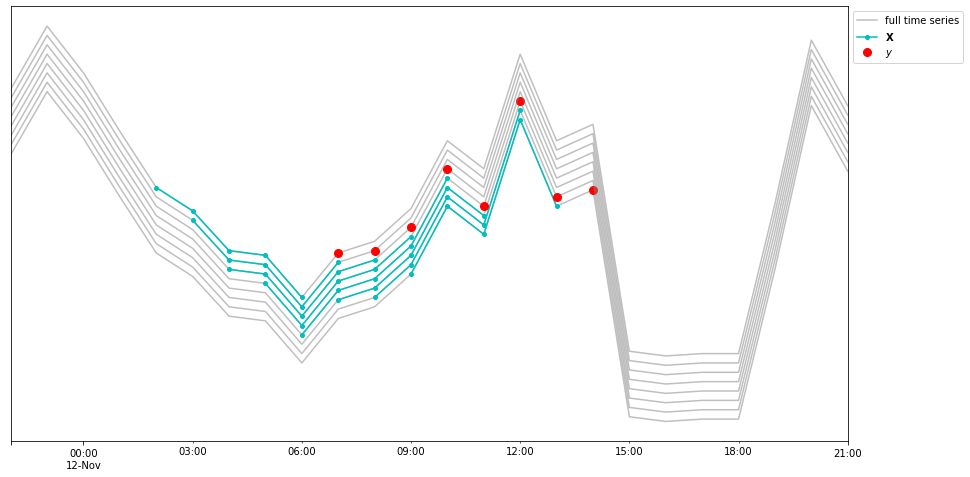

In [21]:
fig, ax = plt.subplots(figsize=(15,8))

window = 5

for i in range(8):

    full = df.Count.iloc[middle - 16:middle+8]
    train = df.Count.iloc[middle - i - window:middle - i ]
    predict = df.Count.iloc[middle - i:middle - i + 1]

    (full + 8*i).plot(ax=ax, c='grey', alpha=0.5)
    (train + 8*i).plot(ax=ax, c='c', markersize=4,
                       marker='o')
    (predict + 8*i).plot(ax=ax, c='r', markersize=8,
                         marker='o', linestyle='')


ax.get_yaxis().set_ticks([])
ax.legend(['full time series',
           '$\mathbf{X}$',
           '$y$'],
          bbox_to_anchor=(1, 1))

In [22]:
window = 5
num_samples = end - middle
X_mat = []
y_mat = []
for i in range(num_samples):
    # Slice a window of features
    X_mat.append(df.Count.iloc[middle - i - window:middle - i].values)
    y_mat.append(df.Count.iloc[middle - i:middle - i + 1].values)

X_mat = np.vstack(X_mat)
y_mat = np.concatenate(y_mat)

In [23]:
# Check if the matrix sizes true
assert X_mat.shape == (num_samples, window)
assert len(y_mat) == num_samples

In [24]:
X_mat

array([[128, 186, 162, 260, 186],
       [100, 128, 186, 162, 260],
       [ 90, 100, 128, 186, 162],
       ...,
       [ 56,  54,  42,  26,  44],
       [100,  56,  54,  42,  26],
       [130, 100,  56,  54,  42]])

In [25]:
y_mat

array([200, 186, 260, ...,  54,  44,  26])

In [26]:
model_lr = LinearRegression(fit_intercept=False)
model_lr = model_lr.fit(X_mat, y_mat)
y_pred_lr = model_lr.predict(X_mat)

In [27]:
df_lr_2 = pd.DataFrame({'Actual': test.Count.values, 'Predicted': y_pred_lr})
df_lr_2

,Actual,Predicted
0,200,193.462856
1,6,246.886440
2,2,165.166565
3,4,179.857174
4,4,124.478033
...,...,...
1181,286,71.911164
1182,256,52.311697
1183,228,39.644516
1184,216,24.772523


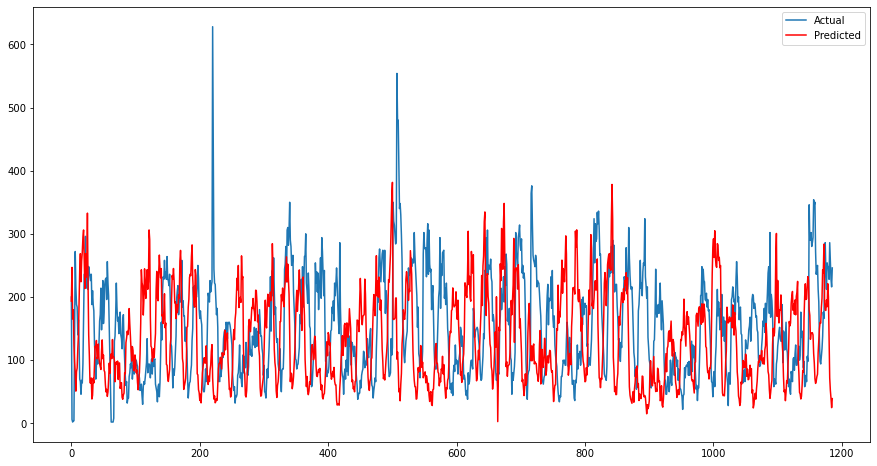

In [28]:
plt.figure(figsize=(15,8))
plt.plot(test.Count.values, label='Actual')
plt.plot(y_pred_lr, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'Actual')

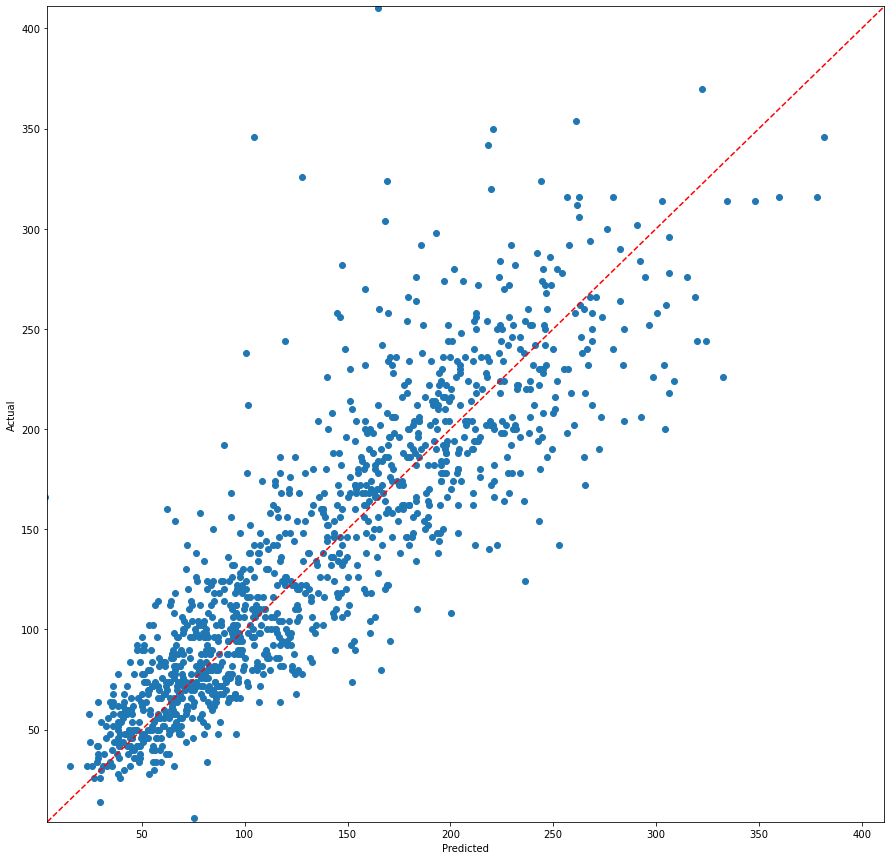

In [29]:
fig, ax = plt.subplots(figsize=(15,15))

ax.scatter(y_pred_lr, y_mat)

one_to_one = np.arange(y_mat.min()-2, y_mat.max()+2)
ax.plot(one_to_one, one_to_one, c='r', linestyle='--')

ax.set_xlim((one_to_one[0], one_to_one[-1]))
ax.set_ylim((one_to_one[0], one_to_one[-1]))
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

In [30]:
calculate_metrics_and_print_results(test.Count.values, y_pred_lr)

Mean Absolute Error: 95.337
Mean Absolute Percentage Error 1.153
Mean Squared Error 13433.378
Root Mean Squared Error:115.902


# Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

# First Implementation

In [32]:
model_rf_1 = RandomForestRegressor().fit(x_training, y_training)
y_pred_rf_1 = model_rf_1.predict(x_test)

In [33]:
df_rf_1 = pd.DataFrame({'Actual': test.Count.values, 'Predicted': y_pred_rf_1})
df_rf_1

,Actual,Predicted
0,200,209.28
1,6,224.14
2,2,211.18
3,4,223.10
4,4,241.54
...,...,...
1181,286,201.94
1182,256,197.32
1183,228,172.90
1184,216,163.50


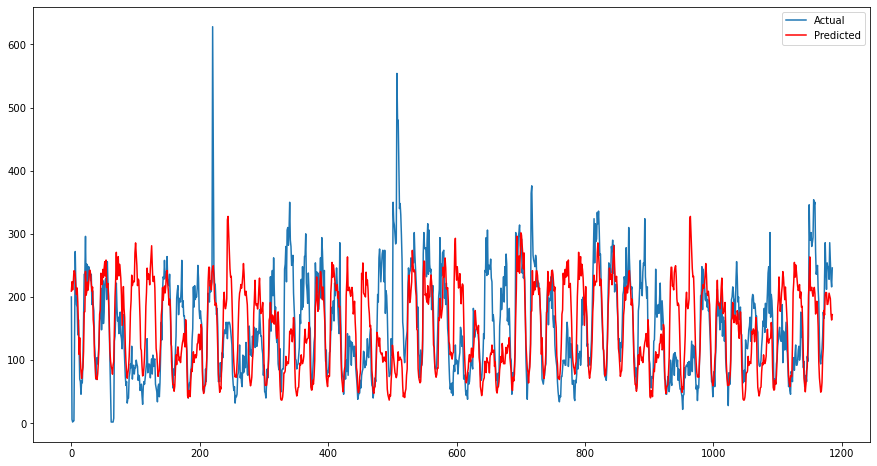

In [34]:
plt.figure(figsize=(15,8))
plt.plot(test.Count.values, label='Actual')
plt.plot(y_pred_rf_1, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

In [35]:
calculate_metrics_and_print_results(test.Count.values, y_pred_rf_1)

Mean Absolute Error: 59.114
Mean Absolute Percentage Error 0.819
Mean Squared Error 6441.968
Root Mean Squared Error:80.262


# Second Implementation

In [36]:
model_rf_2 = RandomForestRegressor().fit(X_mat, y_mat)
y_pred_rf_2 = model_rf_2.predict(X_mat)

In [37]:
df_rf_2 = pd.DataFrame({'Actual': test.Count.values, 'Predicted': y_pred_rf_2})
df_rf_2

,Actual,Predicted
0,200,199.90
1,6,207.20
2,2,230.20
3,4,184.74
4,4,165.14
...,...,...
1181,286,124.14
1182,256,69.02
1183,228,51.96
1184,216,41.00


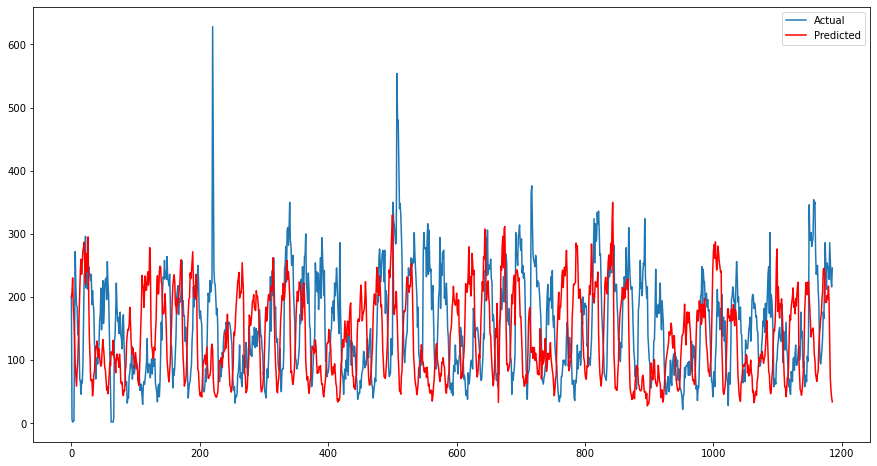

In [38]:
plt.figure(figsize=(15,8))
plt.plot(test.Count.values, label='Actual')
plt.plot(y_pred_rf_2, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

In [39]:
calculate_metrics_and_print_results(test.Count.values, y_pred_rf_2)

Mean Absolute Error: 90.099
Mean Absolute Percentage Error 1.156
Mean Squared Error 11905.707
Root Mean Squared Error:109.113


# Support Vector Regressor

In [40]:
from sklearn.svm import SVR

# First Implementation

In [41]:
model_svr_1 = SVR(C=100).fit(x_training, y_training)
y_pred_svr_1 = model_svr_1.predict(x_test)

In [42]:
df_svr_1 = pd.DataFrame({'Actual': test.Count.values, 'Predicted': y_pred_svr_1})
df_svr_1

,Actual,Predicted
0,200,29.657949
1,6,30.036025
2,2,30.414098
3,4,30.792167
4,4,31.170233
...,...,...
1181,286,31.653484
1182,256,32.031502
1183,228,32.409513
1184,216,32.787517


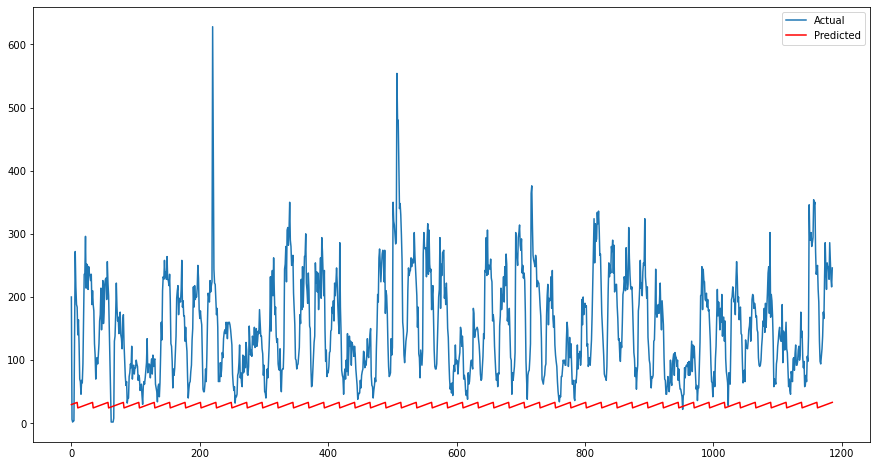

In [43]:
plt.figure(figsize=(15,8))
plt.plot(test.Count.values, label='Actual')
plt.plot(y_pred_svr_1, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

In [44]:
calculate_metrics_and_print_results(test.Count.values, y_pred_svr_1)

Mean Absolute Error: 123.533
Mean Absolute Percentage Error 0.820
Mean Squared Error 21158.060
Root Mean Squared Error:145.458


# Second Implementation

In [45]:
model_svr_2 = SVR().fit(X_mat, y_mat)
y_pred_svr_2 = model_svr_2.predict(X_mat)

In [46]:
df_svr_2 = pd.DataFrame({'Actual': test.Count.values, 'Predicted': y_pred_svr_2})
df_svr_2

,Actual,Predicted
0,200,188.178906
1,6,197.254971
2,2,166.896711
3,4,168.319355
4,4,122.874423
...,...,...
1181,286,93.918677
1182,256,81.891860
1183,228,75.111123
1184,216,64.812123


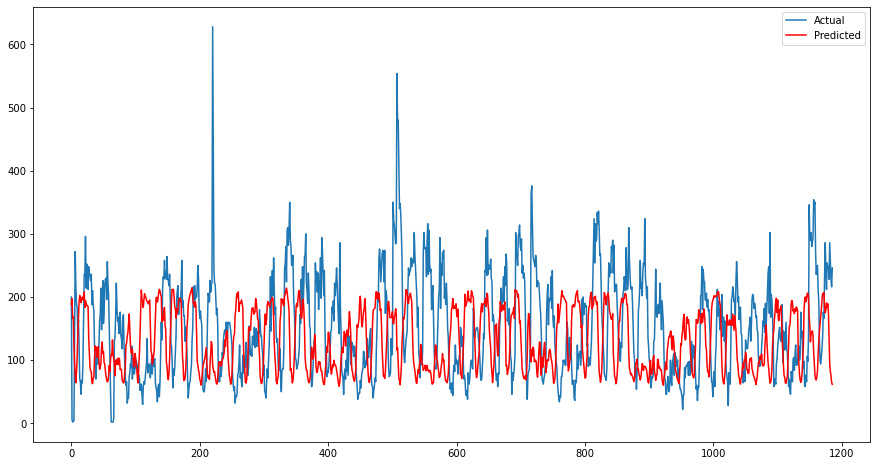

In [47]:
plt.figure(figsize=(15,8))
plt.plot(test.Count.values, label='Actual')
plt.plot(y_pred_svr_2, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

In [48]:
calculate_metrics_and_print_results(test.Count.values, y_pred_svr_2)

Mean Absolute Error: 84.875
Mean Absolute Percentage Error 1.054
Mean Squared Error 10535.548
Root Mean Squared Error:102.643
